Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante. 

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.


1. Qual das disciplinas tem a maior amplitude de nota?

In [49]:
#Manipulação de dados
import pandas as pd
import numpy as np
from pandas import Series

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Estatistica
import scipy.stats as stat

In [50]:
enem = pd.read_json('enem_2023.json')
enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [51]:
enem.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [52]:
def amplitudes(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    
    return df1

In [53]:
amplitudes(enem)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000
amplitude,517.456317,474.019695,487.604568,488.077902,729.160035


In [54]:
def maior_amplitude(df):
    df1 = df.describe()
    df1.loc['amplitude'] = df1.loc['max'] - df1.loc['min']
    max_amplitude = df1.loc['amplitude'].max()
    coluna = df1.columns[df1.isin([max_amplitude]).any()]

    return print (f'A maior amplitude é {max_amplitude} que fica na coluna {coluna}')

In [55]:
maior_amplitude(enem)

A maior amplitude é 729.1600351395 que fica na coluna Index(['Redação'], dtype='object')


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)


In [56]:
enem.columns

Index(['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática',
       'Redação', 'Sexo'],
      dtype='object')

In [57]:
enem_tendencias = enem.dropna(subset=['Linguagens', 
                                      'Ciências humanas', 
                                      'Ciências da natureza', 
                                      'Matemática', 
                                      'Redação', 
                                      'Sexo'])

In [58]:
enem_tendencias = enem_tendencias.drop(columns=['Sexo'])

In [59]:
enem_tendencias.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
5,616.043360,502.007005,497.777935,615.902547,507.365147


In [60]:
enem_tendencias2 = pd.DataFrame()

In [61]:
enem_tendencias2['Matéria'] = list(enem_tendencias.columns)

In [62]:
lista_medias = []

for coluna in enem_tendencias.columns:
    lista_medias.append(enem_tendencias[coluna].mean())

print(lista_medias)

[517.4671621383926, 528.3514542155493, 502.1421008280391, 537.1724797842875, 641.1931234629293]


In [63]:
enem_tendencias2['Média'] = lista_medias

In [64]:
lista_medianas = []

for coluna in enem_tendencias.columns:
    lista_medianas.append(enem_tendencias[coluna].median())

print(lista_medianas)

[517.1288314442, 528.50326342525, 502.93520944194995, 532.9614855364, 639.60269114995]


In [65]:
enem_tendencias2['Mediana'] = lista_medianas

In [66]:
enem_tendencias2.head()

,Matéria,Média,Mediana
0,Linguagens,517.467162,517.128831
1,Ciências humanas,528.351454,528.503263
2,Ciências da natureza,502.142101,502.935209
3,Matemática,537.172480,532.961486
4,Redação,641.193123,639.602691


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?


In [72]:
enem_tendencias.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
5,616.043360,502.007005,497.777935,615.902547,507.365147


In [73]:
enem_ponderado = enem_tendencias.copy()

In [74]:
enem_ponderado["Linguagens"] = enem_ponderado["Linguagens"] * 2

In [75]:
enem_ponderado["Matemática"] = enem_ponderado["Matemática"] * 4
enem_ponderado["Redação"] = enem_ponderado["Redação"] * 2

In [77]:
enem_ponderado.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,1171.338599,686.512178,390.482473,1809.125330,1092.743412
2,1245.464768,495.510719,443.183580,2678.733603,1369.031501
3,700.329209,602.041588,413.979810,2706.435806,1342.474229
4,768.187315,489.249140,609.758123,2081.706791,1488.750095
5,1232.086720,502.007005,497.777935,2463.610189,1014.730294


In [78]:
enem_ponderado["Média ponderada"] = enem_ponderado.loc[0:].sum(axis=1) / 10

In [79]:
enem_ponderado["Média ponderada"].sort_values(ascending=False).head(500)

25     682.987732
824    680.103191
702    671.265814
129    664.384364
60     658.597791
          ...    
400    491.878059
160    491.409454
529    491.032952
386    490.069750
384    489.969900
Name: Média ponderada, Length: 500, dtype: float64

In [80]:
enem_ponderado['Média ponderada'].sort_values(ascending=False).head(500).mean() #média dos 500 alunos mais bem colocados

557.2896772018769

In [81]:
enem_ponderado['Média ponderada'].sort_values(ascending=False).head(500).std() #desvio padrão dos 500 alunos mais bem colocados

40.435866299464266

4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?


In [82]:
enem_ponderado['Média ponderada'].sort_values(ascending=False).head(40).mean() #média dos 40 alunos mais bem colocados

636.6827415075188

In [83]:
enem_ponderado['Média ponderada'].sort_values(ascending=False).head(40).var() #variância dos 40 alunos mais bem colocados

295.76750360041024

5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens? 


In [84]:
enem_tendencias[['Matemática', 'Linguagens']].describe()

,Matemática,Linguagens
count,548.000000,548.000000
mean,537.172480,517.467162
std,87.850751,82.113520
min,319.800000,287.000000
25%,477.018471,462.647968
50%,532.961486,517.128831
75%,591.335247,572.645407
max,807.877902,804.456317


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?


In [85]:
enem_tendencias.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
5,616.043360,502.007005,497.777935,615.902547,507.365147


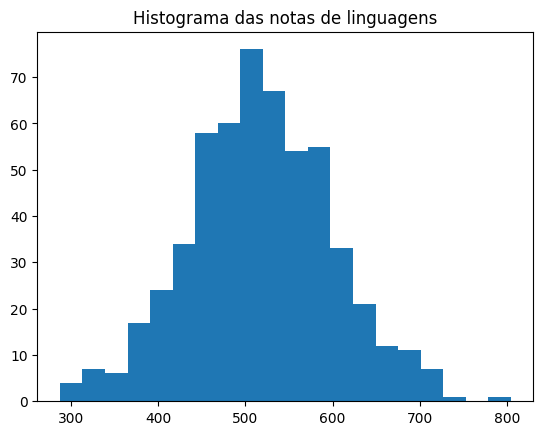

In [86]:
plt.hist(enem_tendencias['Linguagens'], bins = 20)
plt.title("Histograma das notas de linguagens")
plt.show()

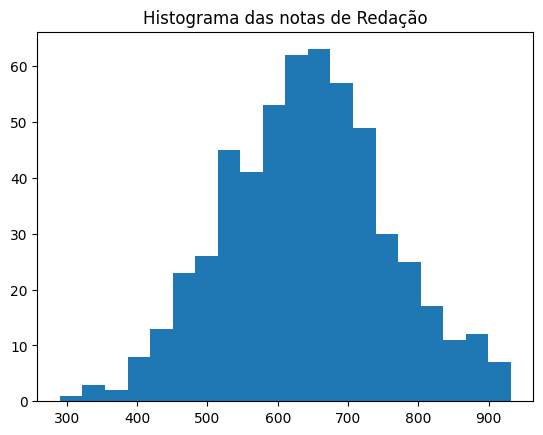

In [87]:
plt.hist(enem_tendencias['Redação'], bins = 20)
plt.title("Histograma das notas de Redação")
plt.show()

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])


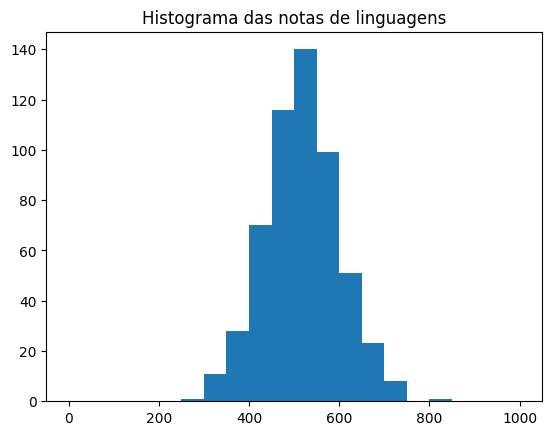

In [88]:
plt.hist(enem_tendencias['Linguagens'], bins = 20, range = [0,1000])
plt.title("Histograma das notas de linguagens")
plt.show()

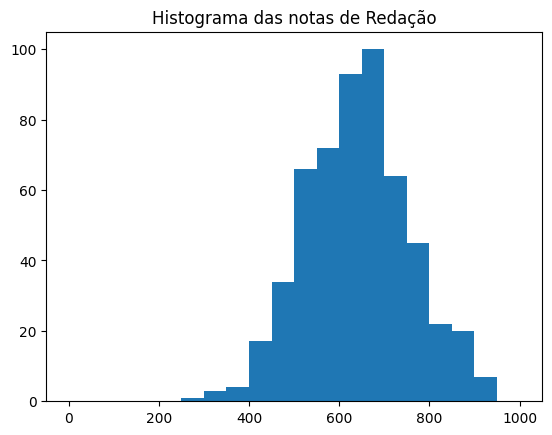

In [89]:
plt.hist(enem_tendencias['Redação'], bins = 20, range = [0,1000])
plt.title("Histograma das notas de Redação")
plt.show()

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.


Text(0.5, 1.0, 'Boxplot: Redação')

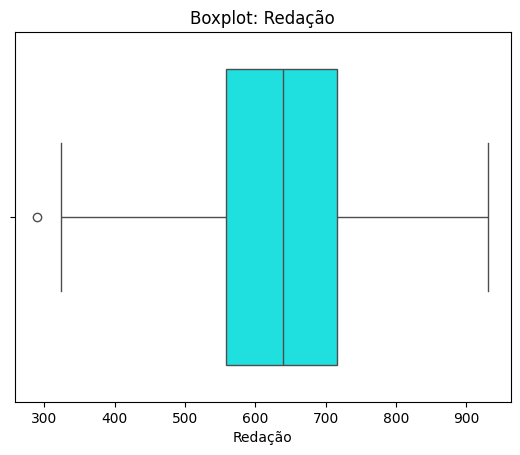

In [90]:
plt.figure()
sns.boxplot(data = enem_tendencias, x= 'Redação', color = 'cyan', showfliers=True)
plt.title("Boxplot: Redação")

Text(0.5, 1.0, 'Boxplot: Ciências Humanas')

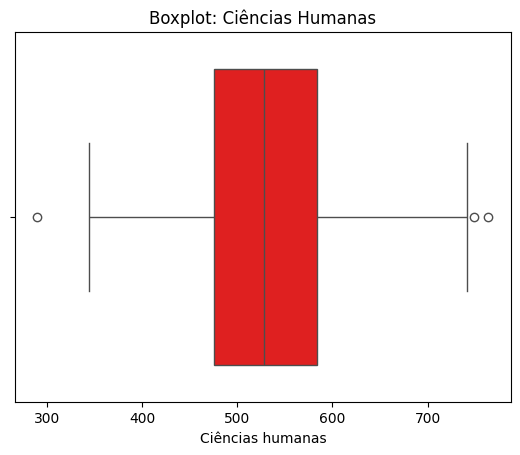

In [91]:
plt.figure()
sns.boxplot(data = enem_tendencias, x = 'Ciências humanas', color = 'red', showfliers = True)
plt.title('Boxplot: Ciências Humanas')


Text(0.5, 1.0, 'Boxplot: Ciências da natureza')

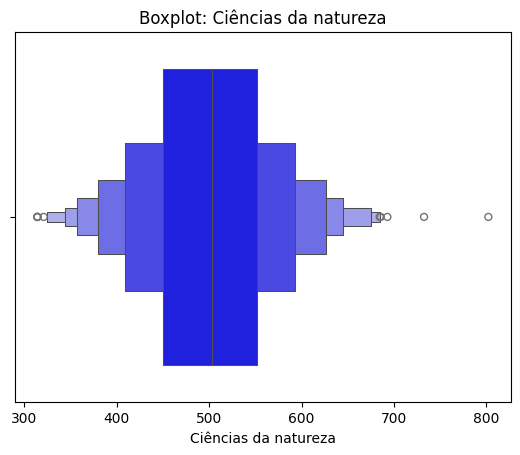

In [93]:
plt.figure()
sns.boxenplot(data = enem_tendencias, x = 'Ciências da natureza', color = 'blue', showfliers=True)
plt.title('Boxplot: Ciências da natureza')


In [94]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)

    #calcula iqr
    iqr = q75 - q25

    #calcula outlier cutoff
    cut_off = iqr * 1.5

    #calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print (' IQR é: ', iqr)

    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
        
    print('O numero de outliers encontrado foi de', len(outliers))
    return lower, upper, outliers

In [95]:
find_outlier_iqr(enem_tendencias, "Ciências da natureza")

 IQR é:  102.26240025932503
O numero de outliers encontrado foi de 2


(296.6045346095625, 705.6541356468626, [802.0045683513, 732.5029639878])

 IQR é:  102.26240025932503
O numero de outliers encontrado foi de 2


<Figure size 1000x600 with 0 Axes>

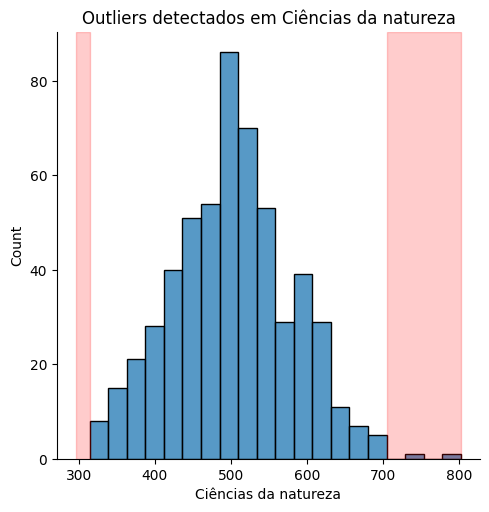

In [96]:
lower, upper, out = find_outlier_iqr(enem_tendencias, "Ciências da natureza")

if (len(out)> 0):
    plt.figure(figsize=(10,6))
    sns.displot(enem_tendencias['Ciências da natureza'], kde = False)
    plt.axvspan(xmin=lower, xmax = enem_tendencias['Ciências da natureza'].min(), alpha=0.2, color='red')
    plt.axvspan(xmin = upper, xmax = enem_tendencias['Ciências da natureza'].max(), alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format("Ciências da natureza"))

In [97]:
find_outlier_iqr(enem_tendencias, "Ciências humanas")

 IQR é:  108.25660959517495
O numero de outliers encontrado foi de 3


(313.4737071952626, 746.5001455759624, [748.8395773643, 763.9196954613, 289.9])

 IQR é:  108.25660959517495
O numero de outliers encontrado foi de 3


<Figure size 1000x600 with 0 Axes>

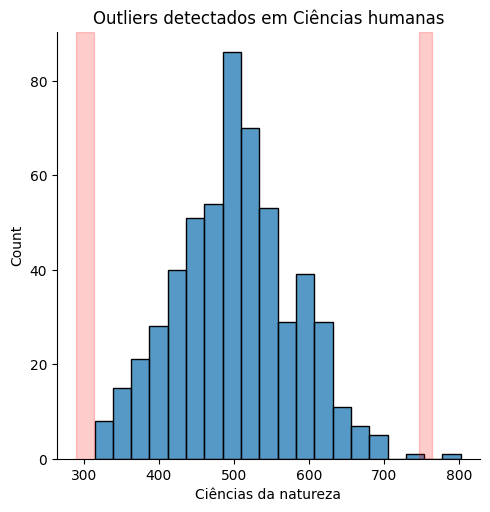

In [98]:
lower, upper, out =  find_outlier_iqr(enem_tendencias, "Ciências humanas")
if (len(out) > 0):
   plt.figure(figsize = (10,6))
   sns.displot(enem_tendencias["Ciências da natureza"], kde=False)
   plt.axvspan(xmin = lower,xmax= enem_tendencias["Ciências humanas"].min(),alpha=0.2, color='red')
   plt.axvspan(xmin = upper,xmax= enem_tendencias["Ciências humanas"].max(),alpha=0.2, color='red')
   plt.title("Outliers detectados em {}".format("Ciências humanas"))

In [99]:
find_outlier_iqr(enem_tendencias, "Redação")

 IQR é:  157.02513490047488
O numero de outliers encontrado foi de 1


(322.98725564181274, 951.0877952437122, [290.3086081677])

 IQR é:  157.02513490047488
O numero de outliers encontrado foi de 1


<Figure size 1000x600 with 0 Axes>

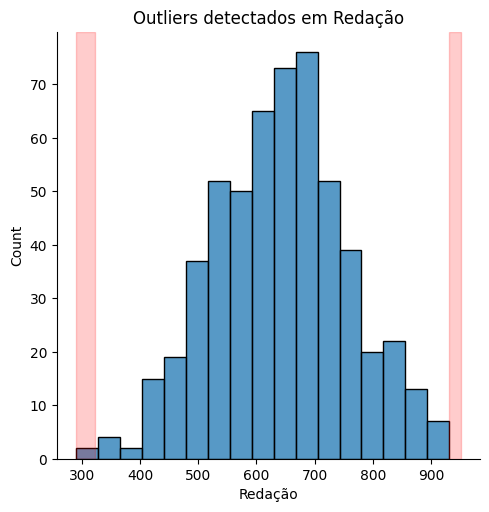

In [100]:
lower, upper, out =  find_outlier_iqr(enem_tendencias, "Redação")
if (len(out) > 0):
   plt.figure(figsize = (10,6))
   sns.displot(enem_tendencias["Redação"], kde=False)
   plt.axvspan(xmin = lower,xmax= enem_tendencias["Redação"].min(),alpha=0.2, color='red')
   plt.axvspan(xmin = upper,xmax= enem_tendencias["Redação"].max(),alpha=0.2, color='red')
   plt.title("Outliers detectados em {}".format("Redação"))

9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)


In [101]:
enem_tendencias.mean()

Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

In [102]:
enem_outlier_redacao = enem_tendencias.copy()

In [104]:
enem_outlier_redacao = enem_outlier_redacao[enem_outlier_redacao.Redação != 290.3086081677]

In [105]:
enem_outlier_redacao['Redação'].mean()

641.8345942404343

In [106]:
enem_outlier_natureza = enem_tendencias.copy()

In [107]:
outliers_natureza = (802.0045683513, 732.5029639878)

In [108]:
enem_outlier_natureza = enem_outlier_natureza[enem_outlier_natureza["Ciências da natureza"].isin(outliers_natureza) == False]

In [109]:
enem_outlier_natureza['Ciências da natureza'].mean()

501.17099582678804

In [110]:
enem_outlier_humanas = enem_tendencias.copy()

In [111]:
outliers_humanas = [748.8395773643, 763.9196954613, 289.9]

In [112]:
enem_outlier_humanas = enem_outlier_humanas[enem_outlier_humanas["Ciências humanas"].isin(outliers_humanas) == False]

In [113]:
enem_outlier_humanas["Ciências humanas"].mean()

527.9521791510007

In [114]:
def porcentagem_diferenca(val1, val2):
    diferenca = abs(val1 - val2)
    media = (val1 + val2) / 2
    porcentagem = diferenca / media * 100
    return print(f"A diferença dos dois valores é de aproximadamente {porcentagem:.4f}%.")

In [115]:
porcentagem_diferenca(enem_tendencias["Redação"].mean(), enem_outlier_redacao["Redação"].mean())

A diferença dos dois valores é de aproximadamente 0.1000%.


In [116]:
porcentagem_diferenca(enem_tendencias["Ciências da natureza"].mean(), enem_outlier_redacao["Ciências da natureza"].mean())

A diferença dos dois valores é de aproximadamente 0.0233%.


In [117]:
porcentagem_diferenca(enem_tendencias["Ciências humanas"].mean(), enem_outlier_redacao["Ciências humanas"].mean())

A diferença dos dois valores é de aproximadamente 0.0114%.


10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [118]:
enem.mean(numeric_only=True)

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [119]:
def substituicao_media(database):
    for coluna in database.columns:
        media = database[coluna].mean()
        database.head()
        database[coluna] = database[coluna].fillna(media)
    return database.mean()

In [120]:
def substituicao_mediana(database):
    for coluna in database.columns:
        mediana = database[coluna].median()
        database[coluna] = database[coluna].fillna(mediana)
    return database.mean()

In [121]:
def substituicao_moda(database):
    for coluna in database.columns:
        moda = database[coluna].mode()[0]
        database[coluna] = database[coluna].fillna(moda)
    return database.mean()

In [123]:
enem_substituicao_medias = enem.drop(columns=["Sexo"])

In [124]:
enem_substituicao_mediana = enem.drop(columns=["Sexo"])

In [125]:
enem_substituicao_moda = enem.drop(columns=["Sexo"])

In [126]:
substituicao_media(enem_substituicao_medias)

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [127]:
substituicao_mediana(enem_substituicao_mediana)

Linguagens              514.578415
Ciências humanas        526.880850
Ciências da natureza    499.520391
Matemática              535.759100
Redação                 637.432194
dtype: float64

In [128]:
substituicao_moda(enem_substituicao_moda)

Linguagens              491.089754
Ciências humanas        511.865175
Ciências da natureza    466.770440
Matemática              519.537070
Redação                 586.411433
dtype: float64

In [129]:
enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [130]:
enem_substituicao_medias.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,499.315583,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048


In [131]:
enem_substituicao_mediana.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,500.479263,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048


In [132]:
enem_substituicao_moda.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,314.400000,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048


In [133]:
def porcentagem_diferenca_colunas(database1, database2):
    for coluna in database1.columns:
        diferenca = abs(database1[coluna].mean() - database2[coluna].mean())
        media = (database1[coluna].mean() + database2[coluna].mean()) / 2
        porcentagem = diferenca / media * 100
        print(f"A diferença da média das duas colunas é de aproximadamente {porcentagem:.4f}%.")
    return 

In [134]:
porcentagem_diferenca_colunas(enem_substituicao_medias, enem)

A diferença da média das duas colunas é de aproximadamente 0.0000%.
A diferença da média das duas colunas é de aproximadamente 0.0000%.
A diferença da média das duas colunas é de aproximadamente 0.0000%.
A diferença da média das duas colunas é de aproximadamente 0.0000%.
A diferença da média das duas colunas é de aproximadamente 0.0000%.


In [135]:
porcentagem_diferenca_colunas(enem_substituicao_mediana, enem)

A diferença da média das duas colunas é de aproximadamente 0.0104%.
A diferença da média das duas colunas é de aproximadamente 0.0306%.
A diferença da média das duas colunas é de aproximadamente 0.0410%.
A diferença da média das duas colunas é de aproximadamente 0.0385%.
A diferença da média das duas colunas é de aproximadamente 0.0551%.


In [136]:
porcentagem_diferenca_colunas(enem_substituicao_moda, enem)

A diferença da média das duas colunas é de aproximadamente 4.6608%.
A diferença da média das duas colunas é de aproximadamente 2.9217%.
A diferença da média das duas colunas é de aproximadamente 6.7375%.
A diferença da média das duas colunas é de aproximadamente 3.1129%.
A diferença da média das duas colunas é de aproximadamente 8.3928%.
